<a href="https://colab.research.google.com/github/psrana/Machine-Learning-using-PyCaret/blob/main/02_PyCaret_for_Classification_with_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **PyCaret for Classification**
---
- It is a bundle of many Machine Learning algorithms.
- Only three lines of code is required to compare 20 ML models.
- Pycaret is available for:
    - Classification
    - Regression
    - Clustering

---

### **Self learning resource**
1. Tutorial on Pycaret **<a href="https://pycaret.readthedocs.io/en/latest/tutorials.html" target="_blank"> Click Here</a>** 

2. Documentation on Pycaret-Classification: **<a href="https://pycaret.readthedocs.io/en/latest/api/classification.html" target="_blank"> Click Here </a>**

---

### **In this tutorial we will learn:**

- Getting Data
- Setting up Environment
- Create Model
- Tune Model
- Plot Model
- Finalize Model
- Predict Model
- Save / Load Model
---



### **(a) Install Pycaret**

In [1]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


### **(b) Get the version of the pycaret**

In [2]:
from pycaret.utils import version
version()

'2.3.10'

---
# **1. Classification: Basics**
---
### **1.1 Get the list of datasets available in pycaret (Total Datasets = 55)**




In [3]:
from pycaret.datasets import get_data
dataSets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


---
### **1.2 Get the "diabetes" dataset (Step-I)**
---

In [4]:
diabetesDataSet = get_data("diabetes")    # SN is 7

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


---
### **1.3 Parameter setting for all models (Step-II)**
---

In [6]:
from pycaret.classification import *
s = setup(data=diabetesDataSet, target='Class variable', silent=True)

# Other Parameters:
# train_size = 0.7
# data_split_shuffle = False

,Description,Value
0,session_id,7121
1,Target,Class variable
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(768, 9)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Class variable',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numer...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', '

---
### **1.4 Run all models (Step-III)**
---

In [7]:
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7411,0.7854,0.5295,0.6938,0.5954,0.4106,0.4220,0.524
rf,Random Forest Classifier,0.7395,0.7893,0.5197,0.7048,0.5909,0.4058,0.4212,0.218
ridge,Ridge Classifier,0.7337,0.0000,0.5137,0.6868,0.5805,0.3919,0.4053,0.012
gbc,Gradient Boosting Classifier,0.7320,0.8003,0.5713,0.6407,0.5993,0.4006,0.4047,0.117
lda,Linear Discriminant Analysis,0.7300,0.7800,0.5089,0.6813,0.5757,0.3841,0.3973,0.016
lightgbm,Light Gradient Boosting Machine,0.7226,0.7792,0.5608,0.6442,0.5934,0.3848,0.3914,0.107
ada,Ada Boost Classifier,0.7095,0.7755,0.5553,0.6148,0.5787,0.3585,0.3629,0.097
et,Extra Trees Classifier,0.7058,0.7340,0.4584,0.6481,0.5263,0.3229,0.3394,0.186
dt,Decision Tree Classifier,0.6889,0.6812,0.6537,0.5645,0.6042,0.3513,0.3548,0.013
knn,K Neighbors Classifier,0.6817,0.7064,0.5100,0.5668,0.5341,0.2942,0.2966,0.018


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7121, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


---
### **1.5 "Three line of code" for model comparison for "Diabetes" dataset**
---



In [8]:
from pycaret.datasets import get_data
from pycaret.classification import *

diabetesDataSet = get_data("diabetes")
setup(data=diabetesDataSet, target='Class variable', silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7729,0.8217,0.5732,0.6900,0.6226,0.4631,0.4694,0.226
ridge,Ridge Classifier,0.7636,0.0000,0.5454,0.6733,0.5999,0.4363,0.4422,0.014
lda,Linear Discriminant Analysis,0.7636,0.8166,0.5510,0.6711,0.6025,0.4381,0.4433,0.016
rf,Random Forest Classifier,0.7503,0.8046,0.5108,0.6599,0.5728,0.4015,0.4098,0.223
ada,Ada Boost Classifier,0.7469,0.8038,0.5791,0.6254,0.5964,0.4141,0.4181,0.101
gbc,Gradient Boosting Classifier,0.7356,0.8030,0.5173,0.6181,0.5614,0.3754,0.3792,0.122
et,Extra Trees Classifier,0.7356,0.7801,0.4827,0.6374,0.5470,0.3655,0.3742,0.192
lightgbm,Light Gradient Boosting Machine,0.7336,0.7817,0.5510,0.6059,0.5725,0.3817,0.3853,0.046
knn,K Neighbors Classifier,0.7301,0.7514,0.5458,0.6005,0.5685,0.3741,0.3769,0.022
nb,Naive Bayes,0.6910,0.7391,0.2928,0.5648,0.3819,0.2053,0.2256,0.013


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3449, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


---
### **1.6 "Three line of code" for model comparison for "Cancer" dataset**
---



In [9]:
from pycaret.datasets import get_data
from pycaret.classification import *

cancerDataSet = get_data("cancer")
setup(data = cancerDataSet, target='Class', silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9645,0.9875,0.9463,0.9561,0.9494,0.9220,0.9241,0.021
rf,Random Forest Classifier,0.9624,0.9905,0.9585,0.9406,0.9480,0.9186,0.9204,0.213
et,Extra Trees Classifier,0.9603,0.9911,0.9522,0.9397,0.9446,0.9136,0.9152,0.183
gbc,Gradient Boosting Classifier,0.9540,0.9882,0.9224,0.9493,0.9334,0.8983,0.9009,0.119
ada,Ada Boost Classifier,0.9519,0.9861,0.9224,0.9449,0.9314,0.8944,0.8968,0.104
nb,Naive Bayes,0.9498,0.9728,0.9342,0.9289,0.9289,0.8902,0.8932,0.014
knn,K Neighbors Classifier,0.9477,0.9772,0.8989,0.9539,0.9228,0.8835,0.8871,0.030
ridge,Ridge Classifier,0.9477,0.0000,0.9048,0.9451,0.9225,0.8832,0.8858,0.015
lda,Linear Discriminant Analysis,0.9456,0.9820,0.8989,0.9440,0.9184,0.8779,0.8810,0.025
lightgbm,Light Gradient Boosting Machine,0.9456,0.9908,0.9228,0.9287,0.9225,0.8807,0.8843,0.041


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5525, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


---
# **2. Classification: working with user dataset**
---
### **2.1 Download the "diabetes" dataset to local system** 
---


In [12]:
diabetesDataSet.to_csv("diabetesDataSet.csv", index=False)

from google.colab import files
files.download('diabetesDataSet.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---
### **2.2 Uploading "user file" from user system**
---

In [ ]:
from google.colab import files
files.upload()

---
### **2.3 "Read" the uploaded file**
---

In [14]:
import pandas as pd
myDataSet = pd.read_csv('diabetesDataSet (1).csv')
myDataSet.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


---
### **2.4 "Compare" the model performance**
---

In [15]:
from pycaret.classification import *

setup(data = myDataSet, target='Class variable', silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7560,0.8150,0.6263,0.6666,0.6446,0.4593,0.4608,0.121
lr,Logistic Regression,0.7465,0.8055,0.5263,0.6844,0.5895,0.4128,0.4231,0.499
ridge,Ridge Classifier,0.7446,0.0000,0.5211,0.6897,0.5883,0.4094,0.4209,0.013
rf,Random Forest Classifier,0.7411,0.8038,0.5316,0.6679,0.5891,0.4048,0.4120,0.214
lda,Linear Discriminant Analysis,0.7408,0.8012,0.5316,0.6745,0.5898,0.4052,0.4141,0.016
et,Extra Trees Classifier,0.7259,0.7776,0.4895,0.6411,0.5512,0.3620,0.3700,0.179
ada,Ada Boost Classifier,0.7205,0.7721,0.5368,0.6265,0.5714,0.3678,0.3740,0.097
lightgbm,Light Gradient Boosting Machine,0.7185,0.7904,0.5842,0.6117,0.5941,0.3797,0.3825,0.107
dt,Decision Tree Classifier,0.7019,0.6707,0.5632,0.5949,0.5719,0.3454,0.3502,0.016
knn,K Neighbors Classifier,0.6980,0.7186,0.5000,0.5923,0.5369,0.3162,0.3226,0.021


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2017, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


---
### **2.5 "Three line of code" for model comparison for "user dataset**

##### Use it, while working on **"Anaconda/Jupyter notebook"** on local machine
---

In [16]:
from pycaret.classification import *
import pandas as pd

#myDataSet = pd.read_csv("myData.csv")
#s = setup(data = myDataSet, target='cancer', silent=True)
#cm = compare_models()

---
# **3. Classification: Apply "Data Preprocessing"**
---

### **3.1 Model performance using "Normalization"**

In [17]:
setup(data=diabetesDataSet, target='Class variable',
      normalize = True, normalize_method = 'zscore', silent=True)
cm = compare_models()

#normalize_method = {zscore, minmax, maxabs, robust}

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7783,0.8226,0.6216,0.7104,0.6563,0.4950,0.5028,0.119
lr,Logistic Regression,0.7690,0.8123,0.5453,0.7267,0.6135,0.4556,0.4712,0.024
ridge,Ridge Classifier,0.7653,0.0000,0.5398,0.7170,0.6071,0.4465,0.4610,0.012
lda,Linear Discriminant Analysis,0.7653,0.8058,0.5453,0.7134,0.6096,0.4481,0.4615,0.016
lightgbm,Light Gradient Boosting Machine,0.7559,0.8050,0.6012,0.6801,0.6232,0.4473,0.4582,0.048
rf,Random Forest Classifier,0.7505,0.8078,0.5360,0.6888,0.5901,0.4181,0.4323,0.221
ada,Ada Boost Classifier,0.7411,0.7872,0.5629,0.6554,0.5968,0.4099,0.4183,0.098
et,Extra Trees Classifier,0.7374,0.7840,0.5249,0.6757,0.5787,0.3933,0.4084,0.192
knn,K Neighbors Classifier,0.7171,0.7339,0.5246,0.6058,0.5560,0.3522,0.3578,0.026
svm,SVM - Linear Kernel,0.6983,0.0000,0.5152,0.6162,0.5317,0.3205,0.3393,0.015


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=7123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


---
### **3.2 Model performance using "Feature Selection"**
---

In [18]:
setup(data=diabetesDataSet, target='Class variable',
      feature_selection = True, feature_selection_method = 'classic', 
      feature_selection_threshold = 0.2, silent=True)
cm = compare_models()

#feature_selection_method = {classic, boruta}

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7651,0.8146,0.5965,0.6859,0.6319,0.4618,0.4685,0.224
lr,Logistic Regression,0.7634,0.8217,0.5690,0.6926,0.6165,0.4495,0.4591,0.034
nb,Naive Bayes,0.7616,0.8106,0.5632,0.6809,0.6124,0.4436,0.4502,0.012
lda,Linear Discriminant Analysis,0.7615,0.8237,0.5582,0.6956,0.6103,0.4432,0.4544,0.013
ridge,Ridge Classifier,0.7577,0.0000,0.5415,0.6927,0.5990,0.4309,0.4431,0.013
lightgbm,Light Gradient Boosting Machine,0.7577,0.8150,0.6342,0.6526,0.6390,0.4575,0.4604,0.040
et,Extra Trees Classifier,0.7559,0.8081,0.5643,0.6709,0.6105,0.4353,0.4404,0.183
qda,Quadratic Discriminant Analysis,0.7484,0.8017,0.4980,0.6843,0.5700,0.4000,0.4135,0.013
gbc,Gradient Boosting Classifier,0.7466,0.8122,0.5807,0.6485,0.6085,0.4228,0.4274,0.098
ada,Ada Boost Classifier,0.7428,0.8070,0.5699,0.6571,0.6003,0.4139,0.4237,0.090


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=753, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


---
### **3.3 Model performance using "Outlier Removal"**
---

In [19]:
setup(data=diabetesDataSet, target='Class variable',
      remove_outliers = True, outliers_threshold = 0.05, silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7745,0.8163,0.5353,0.7296,0.6108,0.4584,0.4731,0.210
ridge,Ridge Classifier,0.7667,0.0000,0.5294,0.7077,0.6021,0.4421,0.4538,0.011
lda,Linear Discriminant Analysis,0.7667,0.8157,0.5353,0.7039,0.6048,0.4438,0.4544,0.014
gbc,Gradient Boosting Classifier,0.7627,0.8285,0.5824,0.6722,0.6161,0.4476,0.4555,0.112
lightgbm,Light Gradient Boosting Machine,0.7490,0.8204,0.5647,0.6500,0.5897,0.4144,0.4260,0.044
rf,Random Forest Classifier,0.7431,0.8254,0.5118,0.6680,0.5665,0.3911,0.4050,0.219
et,Extra Trees Classifier,0.7373,0.7920,0.4647,0.6620,0.5398,0.3646,0.3793,0.309
knn,K Neighbors Classifier,0.7333,0.7589,0.5471,0.6120,0.5737,0.3819,0.3855,0.023
nb,Naive Bayes,0.7216,0.7522,0.5059,0.5990,0.5470,0.3485,0.3520,0.013
ada,Ada Boost Classifier,0.7176,0.7710,0.4941,0.6013,0.5299,0.3348,0.3450,0.097


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3980, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


---
### **3.4 Model performance using "Transformation"**
---

In [20]:
setup(data=diabetesDataSet, target='Class variable',
      transformation = True, transformation_method = 'yeo-johnson', silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7656,0.8339,0.5605,0.7120,0.6237,0.4574,0.4667,0.035
ada,Ada Boost Classifier,0.7600,0.8183,0.5871,0.6942,0.6274,0.4532,0.4628,0.158
ridge,Ridge Classifier,0.7563,0.0000,0.5339,0.7003,0.6020,0.4316,0.4424,0.018
lda,Linear Discriminant Analysis,0.7563,0.8280,0.5444,0.6972,0.6068,0.4347,0.4449,0.014
gbc,Gradient Boosting Classifier,0.7526,0.8338,0.5939,0.6604,0.6213,0.4395,0.4439,0.119
rf,Random Forest Classifier,0.7432,0.8060,0.5550,0.6585,0.5996,0.4130,0.4182,0.395
et,Extra Trees Classifier,0.7356,0.7734,0.5058,0.6576,0.5682,0.3832,0.3921,0.201
lightgbm,Light Gradient Boosting Machine,0.7320,0.8030,0.5819,0.6251,0.6005,0.3997,0.4018,0.045
knn,K Neighbors Classifier,0.7283,0.7509,0.4778,0.6573,0.5488,0.3612,0.3734,0.041
svm,SVM - Linear Kernel,0.7262,0.0000,0.6143,0.6103,0.6061,0.3985,0.4037,0.027


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2071, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


---
### **3.5 Model performance using "PCA"**
---

In [21]:
setup(data=diabetesDataSet, target='Class variable',
      pca = True, pca_method = 'linear', silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7563,0.0000,0.5085,0.7013,0.5817,0.4190,0.4337,0.011
lr,Logistic Regression,0.7469,0.7907,0.5085,0.6771,0.5737,0.4017,0.4136,0.019
lda,Linear Discriminant Analysis,0.7469,0.7914,0.5085,0.6755,0.5731,0.4012,0.4129,0.012
nb,Naive Bayes,0.7412,0.7788,0.4766,0.6831,0.5528,0.3819,0.3983,0.013
qda,Quadratic Discriminant Analysis,0.7375,0.7753,0.4716,0.6638,0.5418,0.3713,0.3849,0.012
rf,Random Forest Classifier,0.7337,0.7943,0.5249,0.6426,0.5708,0.3830,0.3907,0.229
et,Extra Trees Classifier,0.7319,0.7781,0.5091,0.6449,0.5650,0.3763,0.3841,0.186
ada,Ada Boost Classifier,0.7188,0.7602,0.5351,0.6027,0.5625,0.3584,0.3617,0.097
gbc,Gradient Boosting Classifier,0.7170,0.7793,0.5254,0.6009,0.5572,0.3525,0.3558,0.113
lightgbm,Light Gradient Boosting Machine,0.7113,0.7555,0.5348,0.5875,0.5570,0.3446,0.3472,0.047


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=8368,
                solver='auto', tol=0.001)
INFO:logs:compare_models() succesfully completed......................................


---
### **3.6 Model performance using "Outlier Removal" + "Normalization"**
---

In [22]:
setup(data=diabetesDataSet, target='Class variable',
      remove_outliers = True, outliers_threshold = 0.05,
      normalize = True, normalize_method = 'zscore', silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7784,0.8358,0.5562,0.7143,0.6166,0.4656,0.4783,0.021
ridge,Ridge Classifier,0.7686,0.0000,0.5265,0.6992,0.5925,0.4369,0.4502,0.010
lda,Linear Discriminant Analysis,0.7647,0.8336,0.5327,0.6850,0.5916,0.4315,0.4428,0.015
rf,Random Forest Classifier,0.7608,0.8131,0.5449,0.6677,0.5914,0.4269,0.4361,0.228
gbc,Gradient Boosting Classifier,0.7549,0.8136,0.5761,0.6400,0.5983,0.4249,0.4315,0.113
knn,K Neighbors Classifier,0.7471,0.7585,0.5143,0.6397,0.5668,0.3916,0.3983,0.021
et,Extra Trees Classifier,0.7451,0.8020,0.4798,0.6607,0.5503,0.3790,0.3916,0.191
svm,SVM - Linear Kernel,0.7431,0.0000,0.5507,0.6363,0.5796,0.3976,0.4077,0.013
ada,Ada Boost Classifier,0.7412,0.7735,0.5515,0.6214,0.5780,0.3935,0.3991,0.094
lightgbm,Light Gradient Boosting Machine,0.7412,0.8051,0.5820,0.6089,0.5878,0.4017,0.4061,0.045


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3809, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


---
### **3.7 Model performance using "Outlier Removal" +  "Normalization" + "Transformation"**
---

In [23]:
setup(data=diabetesDataSet, target='Class variable',
      remove_outliers = True, outliers_threshold = 0.05, 
      normalize = True, normalize_method = 'zscore', 
      transformation = True, transformation_method = 'yeo-johnson', silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.7686,0.8055,0.5312,0.6997,0.5995,0.4412,0.4525,0.015
lr,Logistic Regression,0.7667,0.8081,0.5316,0.6921,0.5978,0.4376,0.4475,0.021
ridge,Ridge Classifier,0.7647,0.0000,0.5129,0.6958,0.5856,0.4269,0.4396,0.011
et,Extra Trees Classifier,0.7529,0.7832,0.4713,0.6822,0.5536,0.3907,0.4059,0.191
knn,K Neighbors Classifier,0.7490,0.7707,0.5136,0.6468,0.5685,0.3961,0.4034,0.023
gbc,Gradient Boosting Classifier,0.7471,0.7825,0.5316,0.6551,0.5749,0.3997,0.4115,0.114
rf,Random Forest Classifier,0.7412,0.7906,0.4956,0.6522,0.5568,0.3788,0.3902,0.221
ada,Ada Boost Classifier,0.7333,0.7712,0.5309,0.6165,0.5628,0.3743,0.3810,0.094
svm,SVM - Linear Kernel,0.7196,0.0000,0.5923,0.5726,0.5780,0.3689,0.3725,0.016
nb,Naive Bayes,0.7059,0.7425,0.4610,0.5606,0.5006,0.2968,0.3027,0.016


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
INFO:logs:compare_models() succesfully completed......................................


---
### **3.8 Explore more parameters of "setup()" on pycaret**
---
- Explore setup() paramaeters in **Step 1.3**
- **<a href="https://pycaret.readthedocs.io/en/latest/api/classification.html" target="_blank"> Click Here</a>** for more

---
# **4. Classification: More Operations**
---
### **4.1 Build a single model - "RandomForest"**

In [24]:
from pycaret.datasets import get_data
from pycaret.classification import *

diabetesDataSet = get_data("diabetes")
setup(data=diabetesDataSet, target='Class variable', silent=True)

rfModel = create_model('rf')
# Explore more parameters

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8148,0.8958,0.6667,0.7500,0.7059,0.5714,0.5735
1,0.7778,0.8789,0.5263,0.7692,0.6250,0.4749,0.4921
2,0.8148,0.8436,0.7368,0.7368,0.7368,0.5940,0.5940
3,0.7593,0.8684,0.5263,0.7143,0.6061,0.4384,0.4490
4,0.8148,0.8579,0.5263,0.9091,0.6667,0.5507,0.5902
5,0.6481,0.7053,0.3684,0.5000,0.4242,0.1792,0.1835
6,0.7963,0.8278,0.7895,0.6818,0.7317,0.5689,0.5729
7,0.7925,0.8556,0.5000,0.8182,0.6207,0.4890,0.5171
8,0.8302,0.8175,0.6667,0.8000,0.7273,0.6055,0.6108


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2647, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


---
### **4.2 Other available classification models**
---
-	'ada' -	Ada Boost Classifier
-	'dt' -	Decision Tree Classifier
-	'et' -	Extra Trees Classifier
-	'gbc' -	Gradient Boosting Classifier
-	'knn' -	K Neighbors Classifier
-	'lightgbm' -	Light Gradient Boosting Machine
-	'lda' -	Linear Discriminant Analysis
-	'lr' -	Logistic Regression
-	'nb' -	Naive Bayes
-	'qda' -	Quadratic Discriminant Analysis
-	'rf' -	Random Forest Classifier
-	'ridge' -	Ridge Classifier
-	'svm' -	SVM - Linear Kernel

---
### **4.3 Explore more parameters of "create_model()" on pycaret**
---

**<a href="https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.create_model" target="_blank"> Click Here</a>** 

---
### **4.4 Make prediction on the "new unseen dataset"**
---
#### **Get the "new unseen dataset"**



In [25]:
# Select top 10 rows from diabetes dataset
newDataSet = get_data("diabetes").iloc[:10]

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### **Make prediction on "new unseen dataset"**

In [26]:
newPredictions = predict_model(rfModel, data = newDataSet)
newPredictions

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2647, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8,0.8958,0.8333,0.8333,0.8333,0.5833,0.5833


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,Label,Score
0,6,148,72,35,0,33.6,0.627,50,1,1,0.86
1,1,85,66,29,0,26.6,0.351,31,0,0,0.96
2,8,183,64,0,0,23.3,0.672,32,1,1,0.80
3,1,89,66,23,94,28.1,0.167,21,0,0,1.00
4,0,137,40,35,168,43.1,2.288,33,1,1,0.79
5,5,116,74,0,0,25.6,0.201,30,0,0,0.83
6,3,78,50,32,88,31.0,0.248,26,1,0,0.93
7,10,115,0,0,0,35.3,0.134,29,0,1,0.70
8,2,197,70,45,543,30.5,0.158,53,1,1,0.78
9,8,125,96,0,0,0.0,0.232,54,1,1,0.70


---
### **4.5 "Save" and "Download" the prediction result**
---

In [32]:
newPredictions.to_csv("NewPredictions.csv", index=False)

from google.colab import files
files.download('NewPredictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---
### **4.6 "Save" the trained model** 
---

In [ ]:
sm = save_model(rfModel, 'rfModelFile')

---
### **4.7 Download the "trained model file" to user local system** 
---

In [34]:
from google.colab import files
files.download('rfModelFile.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---
### **4.8  "Upload the trained model" --> "Load the model"  --> "Make the prediction" on "new unseen dataset"** 
---
### **4.8.1 Upload the  "Trained Model"**


In [ ]:
from google.colab import files
files.upload()

---
### **4.8.2 Load the "Model"**
---

In [36]:
rfModel = load_model('rfModelFile (1)')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=rfModelFile (1), platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


---
### **4.8.3 Make the prediction on "new unseen dataset"**
---

In [37]:
newPredictions = predict_model(rfModel, data = newDataSet)
newPredictions

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Class variable',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numer...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                           

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8,0.8958,0.8333,0.8333,0.8333,0.5833,0.5833


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,Label,Score
0,6,148,72,35,0,33.6,0.627,50,1,1,0.86
1,1,85,66,29,0,26.6,0.351,31,0,0,0.96
2,8,183,64,0,0,23.3,0.672,32,1,1,0.80
3,1,89,66,23,94,28.1,0.167,21,0,0,1.00
4,0,137,40,35,168,43.1,2.288,33,1,1,0.79
5,5,116,74,0,0,25.6,0.201,30,0,0,0.83
6,3,78,50,32,88,31.0,0.248,26,1,0,0.93
7,10,115,0,0,0,35.3,0.134,29,0,1,0.70
8,2,197,70,45,543,30.5,0.158,53,1,1,0.78
9,8,125,96,0,0,0.0,0.232,54,1,1,0.70


---
# **5. Plot the trained model**
---
**Following parameters can be plot for a trained model**
*   Area Under the Curve         - 'auc'
*   Discrimination Threshold     - 'threshold'
*   Precision Recall Curve       - 'pr'
*   Confusion Matrix             - 'confusion_matrix'
*   Class Prediction Error       - 'error'
*   Classification Report        - 'class_report'
*   Decision Boundary            - 'boundary'
*   Recursive Feat. Selection    - 'rfe'
*   Learning Curve               - 'learning'
*   Manifold Learning            - 'manifold'
*   Calibration Curve            - 'calibration'
*   Validation Curve             - 'vc'
*   Dimension Learning           - 'dimension'
*   Feature Importance           - 'feature'
*   Model Hyperparameter         - 'parameter'

---
### **5.1 Create RandomForest model or any other model**
---

In [38]:
rfModel = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8148,0.8958,0.6667,0.7500,0.7059,0.5714,0.5735
1,0.7778,0.8789,0.5263,0.7692,0.6250,0.4749,0.4921
2,0.8148,0.8436,0.7368,0.7368,0.7368,0.5940,0.5940
3,0.7593,0.8684,0.5263,0.7143,0.6061,0.4384,0.4490
4,0.8148,0.8579,0.5263,0.9091,0.6667,0.5507,0.5902
5,0.6481,0.7053,0.3684,0.5000,0.4242,0.1792,0.1835
6,0.7963,0.8278,0.7895,0.6818,0.7317,0.5689,0.5729
7,0.7925,0.8556,0.5000,0.8182,0.6207,0.4890,0.5171
8,0.8302,0.8175,0.6667,0.8000,0.7273,0.6055,0.6108


INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2647, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


---
### **5.2 Create "Confusion Matrix"**
---

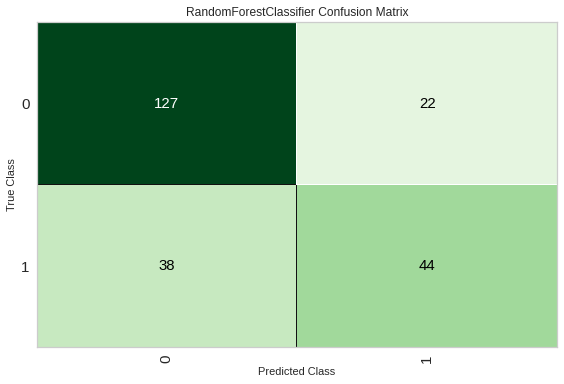

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [39]:
plot_model(rfModel, plot='confusion_matrix')

---
### **5.3 Plot the "learning curve"**
---

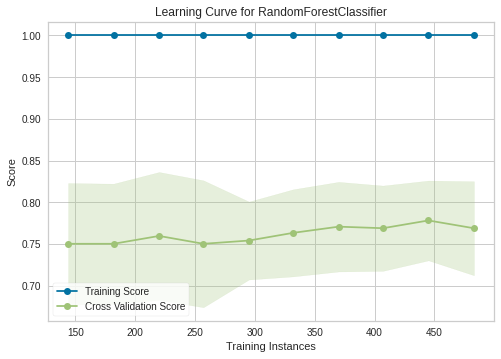

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [40]:
plot_model(rfModel, plot='learning')

---
### **5.4 Plot the "AUC Curve" (Area Under the Curve)**
---

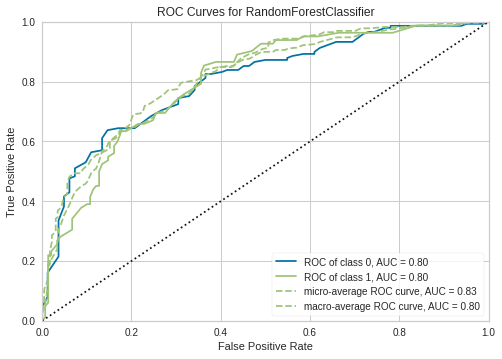

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [41]:
plot_model(rfModel, plot='auc')

---
### **5.5 Plot the "Decision Boundary"**
---

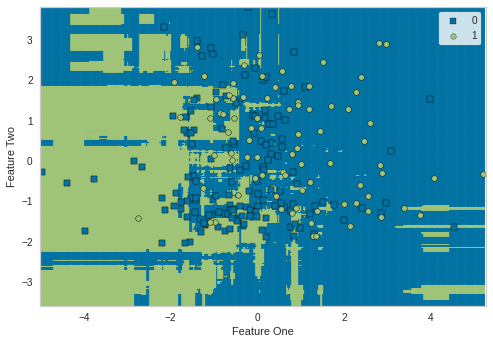

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [42]:
plot_model(rfModel, plot='boundary')

---
### **5.6 Get the model "parameters"**
---

In [43]:
plot_model(rfModel, plot='parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_impurity_split,None


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


---
### **5.7 Explore the more parameters of "plot_model()" on pycaret**
---
**<a href="https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.plot_model" target="_blank"> Click Here </a>**

---
# **6. Feature Importance**
---
### **6.1 Feature Importance using "Random Forest"**


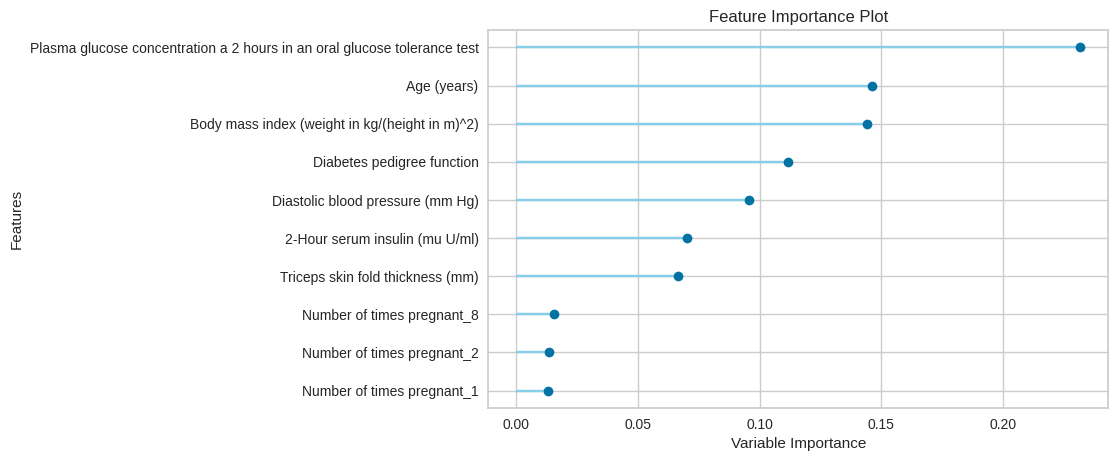

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [44]:
rfModel = create_model('rf', verbose=False)
plot_model(rfModel, plot='feature')

---
### **6.2 Feature Importance using "Extra Trees Regressor"**
---

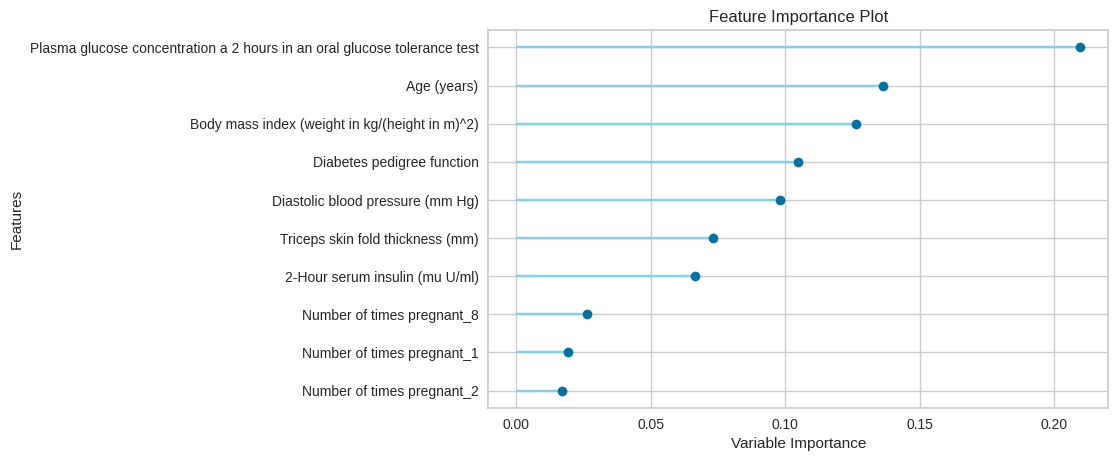

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [45]:
etModel = create_model('et', verbose=False)
plot_model(etModel, plot='feature')

---
### **6.3 Feature Importance using "Decision Tree"**
---

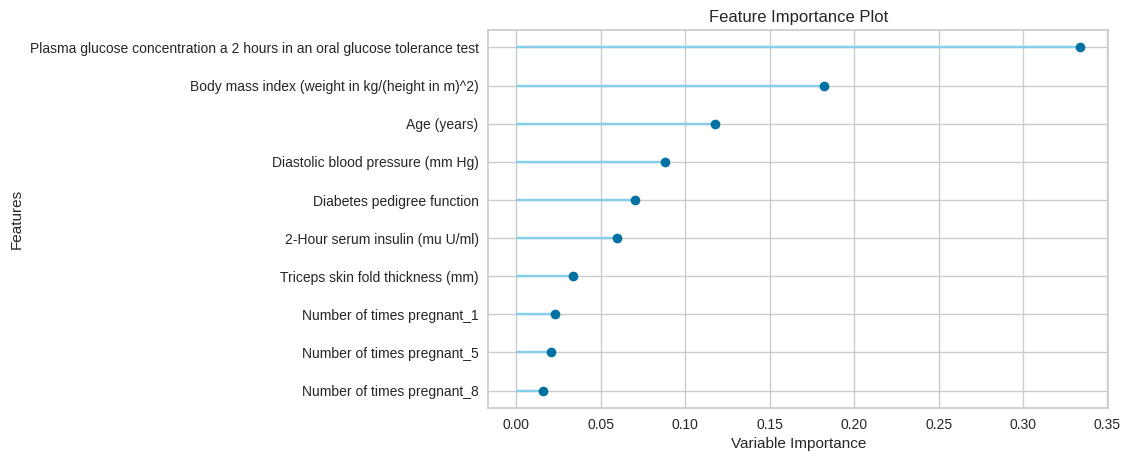

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [46]:
dtModel = create_model('dt', verbose=False)
plot_model(dtModel, plot='feature')

---
# **7. Tune/Optimize the model performance**
---
### **7.1 Train "Decision Tree" with default parameters**


In [47]:
dtModel = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7037,0.6528,0.5000,0.5625,0.5294,0.3143,0.3154
1,0.6481,0.6083,0.4737,0.5000,0.4865,0.2192,0.2194
2,0.7037,0.6872,0.6316,0.5714,0.6000,0.3656,0.3668
3,0.6852,0.6729,0.6316,0.5455,0.5854,0.3338,0.3361
4,0.6667,0.6226,0.4737,0.5294,0.5000,0.2512,0.2520
5,0.6667,0.6226,0.4737,0.5294,0.5000,0.2512,0.2520
6,0.7037,0.6752,0.5789,0.5789,0.5789,0.3504,0.3504
7,0.6226,0.5659,0.3889,0.4375,0.4118,0.1354,0.1359
8,0.7736,0.7476,0.6667,0.6667,0.6667,0.4952,0.4952


INFO:logs:create_model_container: 6
INFO:logs:master_model_container: 6
INFO:logs:display_container: 9
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2647, splitter='best')
INFO:logs:create_model() succesfully completed......................................


#### **Get the "parameters" of Decision Tree**

In [48]:
plot_model(dtModel, plot='parameter')

,Parameters
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1
min_samples_split,2


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


---
### **7.2 Tune "Decision Tree" model**
---

In [49]:
dtModelTuned = tune_model(dtModel, n_iter=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8704,0.8735,0.7778,0.8235,0.8000,0.7042,0.7049
1,0.7593,0.8248,0.5789,0.6875,0.6286,0.4524,0.4561
2,0.7037,0.7023,0.6316,0.5714,0.6000,0.3656,0.3668
3,0.7963,0.8008,0.6842,0.7222,0.7027,0.5479,0.5484
4,0.7407,0.8256,0.4737,0.6923,0.5625,0.3874,0.4014
5,0.7037,0.6752,0.5263,0.5882,0.5556,0.3344,0.3355
6,0.8148,0.8617,0.7895,0.7143,0.7500,0.6035,0.6054
7,0.7547,0.8087,0.6667,0.6316,0.6486,0.4605,0.4609
8,0.7547,0.7873,0.6667,0.6316,0.6486,0.4605,0.4609


INFO:logs:create_model_container: 7
INFO:logs:master_model_container: 7
INFO:logs:display_container: 10
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.005, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2647, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


#### **Get the "tuned parameters" of Decision Tree**

In [50]:
plot_model(dtModelTuned, plot='parameter')

,Parameters
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,6
max_features,1.0
max_leaf_nodes,None
min_impurity_decrease,0.005
min_impurity_split,None
min_samples_leaf,2
min_samples_split,5


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


---
### **7.3 Explore more parameters of "tune_model()" on pycaret**
---
**<a href="https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.tune_model" target="_blank"> Click Here </a>**

---
# **8. AutoML - Advanced Machine Learning**
---

- Select n Best Models:
  - Ensemble, Stacking, Begging, Blending
  - Auto tune the best n models

**<a href="https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.automl" target="_blank">Click Here</a>**


---
# **9. Deploy the model on AWS / Azure**
---
**<a href="https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.deploy_model" target="_blank">Click Here</a>**